<div style="background-color:#e6f2ff; padding:20px; border-radius:10px;">
<img style="float:left; margin-right:20px;" src='alinco.png' width="120"/>
<h1 style="color:#000047;">Actividad 1: Extracción de datos de diferentes fuentes</h1>
<br style="clear:both"/>
</div>

<div style="border-left:4px solid #000047; padding:10px; margin-top:10px; background:#f5f5f5;">
<b>Objetivo:</b> Practicar la extracción, análisis y manipulación de datos provenientes de archivos JSON, XML, CSV e imágenes usando Python.
</div>

<div style="margin-top:10px;">
<b>Instrucciones generales:</b>
<ul>
<li>Lee cuidadosamente cada sección y realiza los ejercicios propuestos.</li>
<li>Utiliza <b>pandas</b> para manipulación de datos tabulares, <b>json</b> y <b>xml.etree.ElementTree</b> para extracción de datos, y <b>matplotlib</b> o <b>opencv</b> para imágenes.</li>
<li>Responde cada pregunta con código y, cuando sea necesario, justifica tu respuesta.</li>
</ul>
</div>

## 1️⃣ JSON: Información de empleados

Supón que tienes el archivo <code>empleados.json</code> con la siguiente estructura:

```json
[
  {"nombre": "Ana", "edad": 28, "departamento": "Ventas", "salario": 2500},
  {"nombre": "Luis", "edad": 35, "departamento": "IT", "salario": 3200},
  {"nombre": "María", "edad": 24, "departamento": "Ventas", "salario": 2300},
  {"nombre": "Carlos", "edad": 40, "departamento": "IT", "salario": 4000}
]
```

<b>Ejercicios:</b>

1. Crea un DataFrame a partir de la extracción de información de este archivo JSON.
2. ¿Cuál es el <b>salario promedio por departamento</b>?
3. ¿Quién es el <b>empleado más joven</b> y a qué departamento pertenece?
4. ¿Cuántos empleados tienen un <b>salario mayor a 2500</b>?
5. ¿Cuál es la <b>diferencia de edad</b> entre el empleado más joven y el de mayor edad?
6. ¿Cuál es el <b>salario total pagado</b> en la empresa?

<i>Tip: Usa pandas.read_json o json.load para cargar los datos.</i>

In [1]:
# Tu código aquí
import pandas as pd

#1.-Crea un DataFrame a partir de la extracción de información del archivo empleados.json
empleados = pd.read_json("empleados.json")
empleados


nombre  edad departamento  salario
0     Ana    28       Ventas     2500
1    Luis    35           IT     3200
2   María    24       Ventas     2300
3  Carlos    40           IT     4000

In [2]:
#2.-Salario promedio por departamento
print("SALARIO PROMEDIO POR DEPARTAMENTO")
print("═" * 40)
promedioDep = empleados.groupby('departamento')['salario'].mean()
promedioDep

SALARIO PROMEDIO POR DEPARTAMENTO
════════════════════════════════════════


departamento
IT        3600.0
Ventas    2400.0
Name: salario, dtype: float64

In [3]:
#3.-Empleado mas joven y a que departamento pertenece
joven = empleados.loc[empleados['edad'].idxmin()]
print(" INFORMACIÓN DE LA PERSONA MÁS JOVEN")
print("═" * 40)
print(f"Nombre: {joven['nombre']}")
print(f"Edad: {joven['edad']} años")
print(f"Departamento: {joven['departamento']}")
print(f"Salario: ${joven['salario']:,.2f}")

 INFORMACIÓN DE LA PERSONA MÁS JOVEN
════════════════════════════════════════
Nombre: María
Edad: 24 años
Departamento: Ventas
Salario: $2,300.00


In [4]:
#4.-Empleados con salario mayor a 2500
empleadosSalario= empleados[empleados['salario'] > 2500]

print("EMPLEADOS CON SALARIO MAYOR A 2500:")
print("═" * 40)
print(empleadosSalario)

EMPLEADOS CON SALARIO MAYOR A 2500:
════════════════════════════════════════
   nombre  edad departamento  salario
1    Luis    35           IT     3200
3  Carlos    40           IT     4000


In [5]:
#5.-Diferencia de edad entre el menor y el mayor de los empleados
joven = empleados.loc[empleados['edad'].idxmin()]
mayor = empleados.loc[empleados['edad'].idxmax()]

print("DIFERENCIA DE EDAD ENTRE EL MENOR Y MAYOR DE LOS EMPLEADOS:")
print("═" * 20+" Menor " +"═" * 20)
print(f"Nombre: {joven['nombre']}")
print(f"Edad: {joven['edad']} años")
print("═" * 20+" Mayor " +"═" * 20)
print(f"Nombre: {mayor['nombre']}")
print(f"Edad: {mayor['edad']} años")
print("═" * 40)
print(f"Diferencia : {mayor['edad']-joven['edad']} años")

DIFERENCIA DE EDAD ENTRE EL MENOR Y MAYOR DE LOS EMPLEADOS:
════════════════════ Menor ════════════════════
Nombre: María
Edad: 24 años
════════════════════ Mayor ════════════════════
Nombre: Carlos
Edad: 40 años
════════════════════════════════════════
Diferencia : 16 años


In [6]:
#6.- Salario total pagado por la empresa
total = empleados['salario'].sum()
print("SALARIO TOTAL PAGADO POR LA EMPRESA")
print("═" * 40)
print(f"Salario total: ${total:,.2f}")

SALARIO TOTAL PAGADO POR LA EMPRESA
════════════════════════════════════════
Salario total: $12,000.00


## 2️⃣ XML: Catálogo de libros

Supón que tienes el archivo <code>libros.xml</code> con la siguiente estructura:

```xml
<libros>
  <libro>
    <titulo>Python para Todos</titulo>
    <autor>Juan Pérez</autor>
    <precio>29.99</precio>
    <anio>2020</anio>
  </libro>
  <libro>
    <titulo>Data Science Avanzado</titulo>
    <autor>María López</autor>
    <precio>45.50</precio>
    <anio>2022</anio>
  </libro>
  <libro>
    <titulo>Ingeniería de Características</titulo>
    <autor>Pedro Ruiz</autor>
    <precio>39.00</precio>
    <anio>2019</anio>
  </libro>
</libros>
```

<b>Ejercicios:</b>

1. Crea un DataFrame a partir de la extracción de información de este archivo XML.
2. ¿Cuál es el <b>libro más caro</b> y su autor?
3. ¿Cuál es el <b>precio promedio</b> de los libros publicados después de 2020?
4. ¿Cuántos libros fueron <b>publicados antes de 2021</b>?
5. ¿Cuál es la <b>diferencia de precio</b> entre el libro más barato y el más caro?
6. ¿Cuántos <b>autores diferentes</b> hay en la lista?

<i>Tip: Usa xml.etree.ElementTree para leer el archivo y pandas para tabular los datos.</i>

In [7]:
#1.- Crea un DataFrame a partir de la extracción de la información del archivo libros.xml
import xml.etree.ElementTree as ET
import pandas as pd
librosXML=ET.parse('libros.xml')
raiz=librosXML.getroot()

df_libros = pd.DataFrame([
    {
        'titulo': libro.find('titulo').text,
        'autor': libro.find('autor').text,
        'precio': float(libro.find('precio').text),
        'anio': int(libro.find('anio').text)
    }
    for libro in raiz.findall('libro')
])

df_libros

titulo        autor  precio  anio
0              Python para Todos   Juan Pérez   29.99  2020
1          Data Science Avanzado  María López   45.50  2022
2  Ingeniería de Características   Pedro Ruiz   39.00  2019

In [8]:
#2.- Libro más caro y su autor
print("LIBRO MÁS CARO")
print("═" * 40)
caro = df_libros.loc[df_libros['precio'].idxmax()]
caro

LIBRO MÁS CARO
════════════════════════════════════════


titulo    Data Science Avanzado
autor               María López
precio                     45.5
anio                       2022
Name: 1, dtype: object

In [9]:
#3.-Precio promedio de los libros publicados despues del 2020
libros2020 =df_libros[df_libros['anio'] > 2020]
print("PRECIO PROMEDIO DE LOS LIBROS PUBLICADOS DESPUES DEL 2020")
print("═" * 40)
promedio=libros2020['precio'].mean()
print(f"Precio: ${promedio:,.2f}")

PRECIO PROMEDIO DE LOS LIBROS PUBLICADOS DESPUES DEL 2020
════════════════════════════════════════
Precio: $45.50


In [10]:
#4.- Libros publicados antes del 2021
libros2021 = df_libros[df_libros['anio'] < 2021]
cantidad = len(libros2021)

print(f"LIBROS PUBLICADOS ANTES DE 2021: {cantidad}")
print("═" * 50)

for _, libro in libros2021.iterrows():
    print(f"* {libro['titulo']} - {libro['autor']} ({libro['anio']})")

LIBROS PUBLICADOS ANTES DE 2021: 2
══════════════════════════════════════════════════
* Python para Todos - Juan Pérez (2020)
* Ingeniería de Características - Pedro Ruiz (2019)


In [11]:
#5.-Diferencia de precio entre el mas barato y el mas caro
bataro = df_libros.loc[df_libros['precio'].idxmin()]
caro = df_libros.loc[df_libros['precio'].idxmax()]

print("DIFERENCIA DE PRECIO ENTRE EL MÁS BARATO Y EL MÁS CARO")
print("═" * 20+" Más Barato " +"═" * 20)
print(f"Nombre: {bataro['titulo']}")
print(f"Precio: ${bataro['precio']}")
print("═" * 20+" Más Caro " +"═" * 20)
print(f"Nombre: {caro['titulo']}")
print(f"Precio: ${caro['precio']}")
print("═" * 40)
print(f"Diferencia: ${(caro['precio']-bataro['precio']):,.2f}")

DIFERENCIA DE PRECIO ENTRE EL MÁS BARATO Y EL MÁS CARO
════════════════════ Más Barato ════════════════════
Nombre: Python para Todos
Precio: $29.99
════════════════════ Más Caro ════════════════════
Nombre: Data Science Avanzado
Precio: $45.5
════════════════════════════════════════
Diferencia: $15.51


In [12]:
#6.Cuantos autores diferentes tiene la información
conteo_autores = df_libros['autor'].value_counts()
cantidad = len(conteo_autores)

print(f"Autores diferentes: {cantidad}")
print("═" * 50)
for autor, cantidad in conteo_autores.items():
    print(f"* {autor}: {cantidad} libro(s)")


Autores diferentes: 3
══════════════════════════════════════════════════
* Juan Pérez: 1 libro(s)
* María López: 1 libro(s)
* Pedro Ruiz: 1 libro(s)


## 3️⃣ CSV: Ventas detalladas

Supón que tienes el archivo <code>ventas_detalladas.csv</code> con la siguiente estructura:

```csv
producto,fecha,cantidad,precio_unitario
A,2023-01-01,10,2.5
B,2023-01-02,5,3.0
A,2023-01-03,7,2.5
C,2023-01-01,3,4.0
B,2023-01-03,2,3.0
```

<b>Ejercicios:</b>

1. Crea un DataFrame con los datos extraídos del archivo.
2. ¿Cuál es el <b>total vendido</b> por producto y por fecha?
3. ¿En qué fecha se vendió la <b>mayor cantidad de productos</b>?
4. ¿Cuál es el <b>producto con mayor ingreso total</b>?
5. ¿Cuál es la <b>media de cantidad vendida</b> por producto?
6. ¿Qué producto tuvo <b>ventas todos los días registrados</b>?

<i>Tip: Usa pandas.read_csv y agrupa los datos según lo que se pide.</i>

In [13]:
#Crea un DataFrame con los datos extraídos del archivo.
import pandas as pd
df_ventas = pd.read_csv("ventas_detalladas.csv")

df_ventas

Unnamed: 0 producto       fecha  cantidad  precio_unitario
0           0        A  2023-01-01        10              2.5
1           1        B  2023-01-02         5              3.0
2           2        A  2023-01-03         7              2.5
3           3        C  2023-01-01         3              4.0
4           4        B  2023-01-03         2              3.0

In [14]:
#2. ¿Cuál es el total vendido por producto y por fecha?
df_ventas['total_venta'] = df_ventas['cantidad'] * df_ventas['precio_unitario']
total_vent = df_ventas.groupby(['producto', 'fecha'])['total_venta'].sum().reset_index()
print(" TOTAL VENDIDO POR PRODUCTO Y FECHA")
print("═" * 40)
print(f"Producto| Fecha      | $Total vendido")
for _,venta in total_vent.iterrows():
    print(f"{venta['producto']}       | {venta['fecha']} | ${venta['total_venta']}")

 TOTAL VENDIDO POR PRODUCTO Y FECHA
════════════════════════════════════════
Producto| Fecha      | $Total vendido
A       | 2023-01-01 | $25.0
A       | 2023-01-03 | $17.5
B       | 2023-01-02 | $15.0
B       | 2023-01-03 | $6.0
C       | 2023-01-01 | $12.0


In [15]:
#3. ¿En qué fecha se vendió la mayor cantidad de productos?
item  = df_ventas.loc[df_ventas['cantidad'].idxmax()]
print(f"FECHA EN LA QUE SE VENDIO MAS PRODUCTO {item['fecha']}")
print("═" * 40)
print(f"Producto: {item['producto']}")    
print(f"Fecha: {item['fecha']}")
print(f"Cantidad: {item['cantidad']}")
print(f"Total Vendido: ${item['total_venta']}")

FECHA EN LA QUE SE VENDIO MAS PRODUCTO 2023-01-01
════════════════════════════════════════
Producto: A
Fecha: 2023-01-01
Cantidad: 10
Total Vendido: $25.0


In [16]:
#4. ¿Cuál es el producto con mayor ingreso total?
ingresoTotal = df_ventas.groupby('producto')['total_venta'].sum()
print("PRODUCTO CON MAYOR INGRESO TOTAL")
print("═" * 40)
print(f"Producto: {ingresoTotal.idxmax()}")
print(f"Ingreso total: ${ingresoTotal.max():.2f}")

PRODUCTO CON MAYOR INGRESO TOTAL
════════════════════════════════════════
Producto: A
Ingreso total: $42.50


In [17]:
#5. ¿Cuál es la media de cantidad vendida por producto?
mediaProducto = df_ventas.groupby('producto')['cantidad'].median()
print("MEDIA DE UNIDADES VENDIDAS POR PRODUCTO")
print("═" * 40)

for producto, media in mediaProducto.sort_values(ascending=False).items():
    print(f"{producto}: {media:.1f} unidades")

MEDIA DE UNIDADES VENDIDAS POR PRODUCTO
════════════════════════════════════════
A: 8.5 unidades
B: 3.5 unidades
C: 3.0 unidades


In [18]:
#6. ¿Qué producto tuvo ventas todos los días registrados?

fechas_unicas = df_ventas['fecha'].unique()
total_fechas = len(fechas_unicas)
productoGroup = df_ventas.groupby('producto')['fecha'].nunique()
productos_diasReg= productoGroup[productoGroup== total_fechas]
print(f"PRODUCTOS VENDIDOS TODOS LOS DIAS REGISTRADOS : {len(productos_diasReg)}")
print("═" * 40)

for prod, dia in productoGroup.items():
    band= False
    if dia == total_fechas:
        band = True
    print(f"{prod}: {dia} de {total_fechas} días - {"COMPLETO" if band else "INCOMPLETO"}")


PRODUCTOS VENDIDOS TODOS LOS DIAS REGISTRADOS : 0
════════════════════════════════════════
A: 2 de 3 días - INCOMPLETO
B: 2 de 3 días - INCOMPLETO
C: 1 de 3 días - INCOMPLETO


## 4️⃣ Imágenes: Análisis de pixeles

Supón que tienes la imagen <code>alinco.png</code> en la misma carpeta que este notebook.

<b>Ejercicios:</b>

1. Extrae la información de los pixeles de la imagen y muestra sus dimensiones.
2. ¿Cuál es el <b>valor RGB</b> del píxel (50, 50)?
3. ¿Cuál es el <b>color predominante</b> en la imagen?

<i>Tip: Usa matplotlib.pyplot.imread o cv2.imread para cargar la imagen y numpy para analizar los datos.</i>

In [19]:
#1. Extrae la información de los pixeles de la imagen y muestra sus dimensiones.
import matplotlib.pyplot as plt

imagen=plt.imread('alinco.png')
print("INFORMACIÓN DE LA IMAGEN")
print("═" * 40)
print(f"Dimensiones: {imagen.shape}")
print(f"Tamaño total: {imagen.size} píxeles")

INFORMACIÓN DE LA IMAGEN
════════════════════════════════════════
Dimensiones: (110, 120, 4)
Tamaño total: 52800 píxeles


In [20]:
#2. ¿Cuál es el valor RGB del píxel (50, 50)?
pixel = imagen[50, 50]
print("═" * 40)
print(f"Ancho, Alto, Canal: {imagen.shape}")
print("Canal 3.-RGB - Solo información de color")
print("Canal 4.-RGBA - Color + transparencia")
print("Canal 1.-Escala de grises - Solo intensidad")
print("═" * 40)

if len(pixel) == 3:
    print("Formato: RGB")
    r, g, b = pixel
    print(f"Rojo: {r:.6f}")
    print(f"Verde: {g:.6f}")
    print(f"Azul: {b:.6f}")
elif len(pixel) == 4:
    print("Formato: RGBA")
    r, g, b, a = pixel
    print(f"Rojo: {r:.6f}")
    print(f"Verde: {g:.6f}")
    print(f"Azul: {b:.6f}")
    print(f"Alpha: {a:.6f}")
else:
    print(f"Formato: Escala de grises - Valor: {pixel:.6f}")

════════════════════════════════════════
Ancho, Alto, Canal: (110, 120, 4)
Canal 3.-RGB - Solo información de color
Canal 4.-RGBA - Color + transparencia
Canal 1.-Escala de grises - Solo intensidad
════════════════════════════════════════
Formato: RGBA
Rojo: 0.349020
Verde: 0.501961
Azul: 0.647059
Alpha: 1.000000


In [103]:
#3. ¿Cuál es el color predominante en la imagen?
import numpy as np
muestra = 5280

pixeles = imagen.reshape(-1, imagen.shape[2])
# convertir a 0-255
pixeles = (pixeles * 255).astype(np.uint8)

# muestra aleatoria
np.random.seed(42)
indices = np.random.choice(len(pixeles), muestra, replace=False)
pixeles_muestra = pixeles[indices]

print("MUESTRA DE PIXELES DE LA IMAGEN")
print("═" * 40)
print(f"Tamaño total: {imagen.size} píxeles")
print(f"Muestra utilizada: {len(pixeles_muestra)} píxeles")

MUESTRA DE PIXELES DE LA IMAGEN
════════════════════════════════════════
Tamaño total: 52800 píxeles
Muestra utilizada: 5280 píxeles


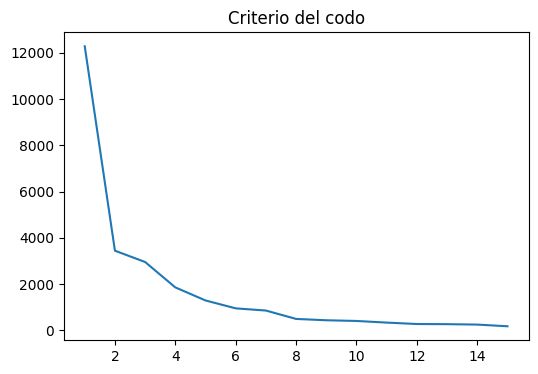

In [91]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

X=np.array(pixeles_muestra)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
z = hierarchy.linkage(X, metric='euclidean', method='ward')

last = z[-15:, 2]
last_rev = last[::-1]
inds = np.arange(1, len(last_rev)+1)
plt.figure(figsize=(6,4))
plt.title("Criterio del codo")
plt.plot(inds, last_rev)
plt.show()

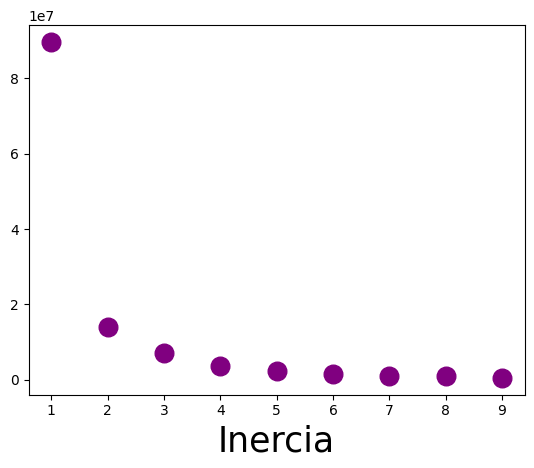

In [92]:
from sklearn.cluster import KMeans
inercias =[]
for k in range(1,10):
    kmeans =KMeans(n_clusters=k).fit(X)
    inercias.append(kmeans.inertia_)

plt.Figure(figsize=(6,5), dpi=100)
plt.scatter(range(1,10), inercias, marker="o", s=180,color= "purple")
plt.xlabel("Número de Clusters", fontsize=25)
plt.xlabel("Inercia", fontsize=25)
plt.show()

In [114]:
print("CON EL CRITERIO DEL CODO NOS DAMOS CUENTA QUE SON 2 LOS COLORES QUE MÁS SE REPITEN EN LA IMAGEN")
print("Y APLICANDO KMEANS VISUALIZAMOS CUALES SON ESTOS DOS COLORES")
print("═" * 100)

kmeans = KMeans(n_clusters=2,random_state=0).fit(pixeles_muestra)
labels = kmeans.labels_
centros = kmeans.cluster_centers_.astype(int)
counts = np.bincount(labels)
porcentajes = (counts / len(pixeles_muestra)) * 100

for i in range(len(centros)):
    r, g, b, a = centros[i]
    print(f"RGBA({r:3d}, {g:3d}, {b:3d}, {a:3d}) - {porcentajes[i]:5.1f}%")


CON EL CRITERIO DEL CODO NOS DAMOS CUENTA QUE SON 2 LOS COLORES QUE MÁS SE REPITEN EN LA IMAGEN
Y APLICANDO KMEANS VISUALIZAMOS CUALES SON ESTOS DOS COLORES
════════════════════════════════════════════════════════════════════════════════════════════════════
RGBA(  0,   0,   0,   7) -  81.9%
RGBA( 80, 149, 156, 215) -  18.1%
